# 缪子探测实验数据分析

In [1]:
import numpy as np
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
mpl.rcParams["text.usetex"]=True

## 缪子寿命的测量
从原数据文件中读取所有的衰变时间测量结果，输出到`muondecay.txt`中，然后将其在Origin中进行直方图的绘制和指数函数拟合。

In [2]:
f = open('D:\muon\muondata_G3\decay\muondecay_9.txt') 
s = f.readline()
a1=[]
a2=[]
nevent=10000*500
count=0
while s:  
     arr=s.split(' ')
     if(arr[0].startswith('#')):
        time=20*int(arr[0][1:4],16)#计算衰变所经历的时间
        if(time<20*1102):#当“衰变时间”小于10倍的平均衰变时间时
#             print("decay event")
            a1.append(time)
        else:
            #print("through going")
            a2.append(time)
     else:
        #print("other")
        pass
     s=f.readline()
     count+=1
print(a1)
np.savetxt("muondecay.txt",a1)

[2960, 2020, 260, 900, 5480, 10520, 320, 15020, 1860, 2280, 4000, 1580, 8300, 21200, 3300, 300, 1080, 80, 2840, 20140, 760, 100, 460, 7820, 4220, 5680, 620, 6580, 19140, 20460, 2780, 580, 7880, 11880, 1780, 3600, 2260, 1300, 980, 11520, 4760, 1780, 3580, 1240, 1420, 14580, 17200, 6700, 9560, 2460, 380, 14640, 8540, 2980, 19100, 1040, 3860, 9340, 80, 960, 21740, 2240, 2140, 3260, 18140, 1260, 1420, 2860, 13380, 1300, 5400, 1060, 17660, 4400, 15600, 12120, 6700, 7340, 15760, 14680, 9420, 360, 360, 1960, 8100, 19060, 1040, 13420, 1480, 1920, 11460, 2340, 16540, 260, 460, 480, 2260, 19300, 22000, 20960, 2680, 2980, 12800, 1160, 6580, 7800, 14760, 1060, 14900, 2420, 13900, 560, 1700, 14580, 6260, 2680, 1800, 10780, 100, 21080, 2920, 400, 6080, 1540, 300, 160, 17960, 1460, 12100, 840, 9660, 11640, 17000, 3180, 16420, 2440, 16500, 22000, 4780, 4920, 13100, 560, 17940, 10760, 620, 560, 460, 1520, 9140, 17860, 320, 1260, 4960, 4840, 5620, 2080, 4700, 6460, 4720, 16660, 13660, 2340, 440, 5180, 1

(array([2.57664588e-04, 1.73643527e-04, 2.12853355e-04, 1.34433698e-04,
        1.28832294e-04, 1.00825274e-04, 6.16154449e-05, 7.28182531e-05,
        4.48112327e-05, 2.80070204e-05, 4.48112327e-05, 7.84196572e-05,
        3.36084245e-05, 4.48112327e-05, 3.36084245e-05, 4.48112327e-05,
        3.36084245e-05, 1.68042123e-05, 1.12028082e-05, 4.48112327e-05,
        1.68042123e-05, 1.68042123e-05, 6.16154449e-05, 1.68042123e-05,
        2.24056163e-05, 1.68042123e-05, 2.24056163e-05, 1.12028082e-05,
        6.16154449e-05, 2.24056163e-05, 2.80070204e-05, 2.24056163e-05,
        1.68042123e-05, 1.12028082e-05, 1.12028082e-05, 5.04126368e-05,
        2.80070204e-05, 1.68042123e-05, 3.92098286e-05, 1.12028082e-05,
        4.48112327e-05, 2.80070204e-05, 1.12028082e-05, 3.92098286e-05,
        1.68042123e-05, 1.68042123e-05, 4.48112327e-05, 2.24056163e-05,
        1.12028082e-05, 1.12028082e-05, 2.24056163e-05, 4.48112327e-05,
        1.12028082e-05, 2.80070204e-05]),
 array([   60.        

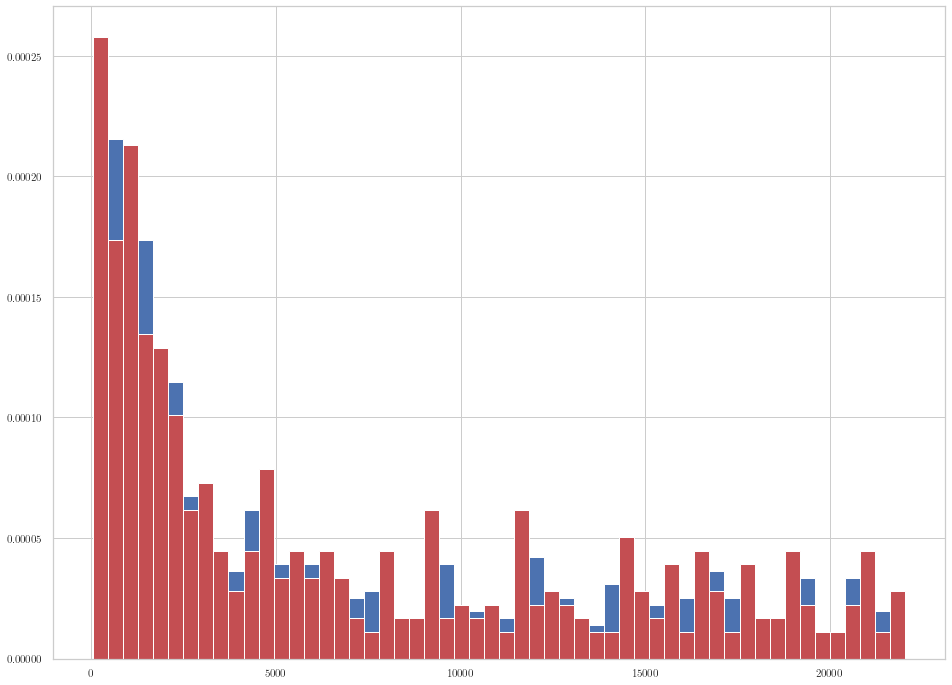

In [5]:
fig, ax = plt.subplots(figsize=(16,12))
ax.hist(a1,density=True,bins=27,color='b')
ax.hist(a1,density=True,bins=54,color='r')

## 缪子通量的测量
1. 使用`read_flux`函数从原数据文件中读取出所有的通量测量点；
2. 使用`fitting_histogram`函数将通量测量点绘制直方图并拟合高斯分布
3. 最后输出图片和各组的均值方差。

In [7]:
def read_flux(path):
    f = open(path,'rU')
    s = f.readline()
    a1=[]
    a2=[]
    count=0
    times=0
    while s:  
         arr=s.split(' ')
         if(arr[0].startswith('#')):
            times=int(arr[0][1:4],16)
        #print(times)
            #if(times<20*1102):
            #    #print("decay event")
            #    a1.append(times)
            #else:
            #    #print("through going")
            #    a2.append(times)
         else:
            #print("other")
            if(arr[0].startswith('&GPGGA')):#到了下一次事件，把上一次事件的最终计数值记下来
                    a1.append(times)
                    #print(times)
            else:
                pass
         s=f.readline()
         count+=1
    return(a1)

In [8]:
def correction(x0,n):#去除n*sigma之外的点
    x = np.asarray(x0)  
    x1 = x[x > (np.mean(x)- n*x.std())]
    x2 = x1[x1 < (np.mean(x)+ n*x.std())]
    return(x2)

In [13]:
def fitting_histogram(X,title=None,ax=None,bins=None):
    if ax is None:
        fig,ax = plt.subplot(1,1,figsize=(8,4))
    
    X = correction(X,3) #调用correction函数删去3*sigma之外的点
    
    # fit the sample and create the fitting random variable
    loc, scale = stats.norm.fit(X)
    fitting_Y = stats.norm(loc=loc, scale=scale)
    # use the fitting random variable to set plot range
    x_lim = fitting_Y.interval(0.99)
    x = np.linspace(*x_lim,num=100)
    
    if bins is None:
        ax.hist(X,label="Samples",density=True)
    else:
        ax.hist(X,label="Samples",density=True,bins=bins)
        
    ax.plot(x, fitting_Y.pdf(x),label="Fitting distribution",lw=3)
    #ax.set_xlim(*x_lim)
    ax.axvline(loc,color="grey",linestyle=":",lw=3)
    ax.set_yticks([])
    ax.set_xlabel("$\Phi$")
    ax.annotate('$ \Phi= {:.3f}\pm {:.3f} $'.format(loc, scale),
       fontsize=14,color='black',
       xy=(loc,0), xycoords="data",
       xytext=(50,+140),textcoords="offset points",
       )
    ax.set_title(title,fontsize=16)
    ax.legend()
    return(loc, scale)

### 不同高压

In [6]:
alldata = []#用于存放七个一维数组
HV = np.linspace(850,1150,7,dtype = int)
for hv in HV:
    data = read_flux("D:\muon\muondata_G3\\fluxdata\HV{}\muonflux_9.txt".format(hv))
    alldata.append(data)
# np.savetxt("muonflux1.txt",a1)

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

[ 6.32702431 13.68351963 24.07209805 26.65515675 35.99785226 43.83024291
 56.84332525] [3.01694592 4.56362751 5.81480121 5.8336108  6.73619766 7.28900619
 8.15636884]


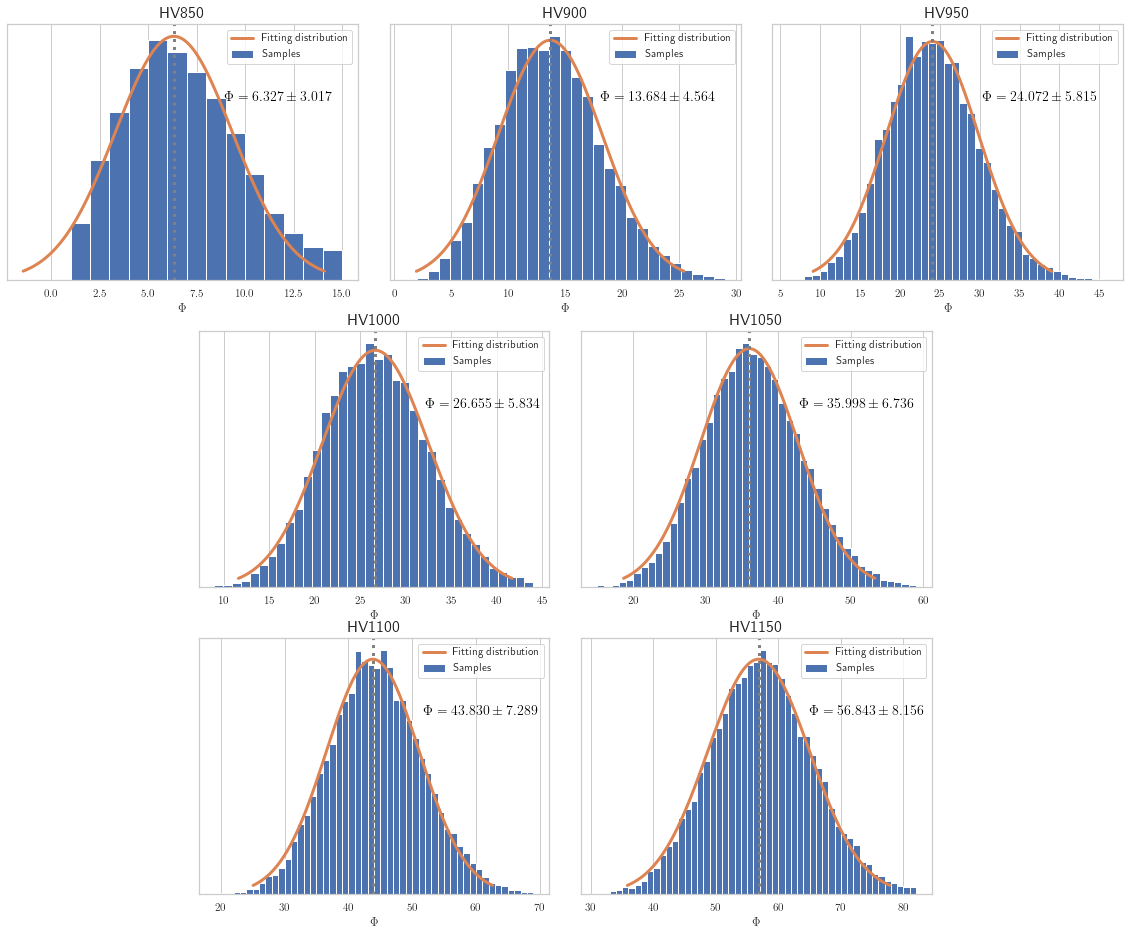

In [23]:
#建立画板，3,2,2共七张图
fig = plt.figure(figsize=(20, 16))
ax0 = plt.subplot2grid((3, 6), (0, 0),colspan=2)
ax1 = plt.subplot2grid((3, 6), (0, 2),colspan=2)
ax2 = plt.subplot2grid((3, 6), (0, 4),colspan=2)
ax3 = plt.subplot2grid((3, 6), (1, 1),colspan=2)
ax4 = plt.subplot2grid((3, 6), (1, 3),colspan=2)
ax5 = plt.subplot2grid((3, 6), (2, 1),colspan=2)
ax6 = plt.subplot2grid((3, 6), (2, 3),colspan=2)
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6]

HV_mu = np.zeros(7)
HV_sigma = np.zeros(7)
HV = np.linspace(850,1150,7,dtype = int)
bins = [15,29,41,36,44,50,51]
i = 0
while i<7:
    if i==0:
        alldata[i]=correction(alldata[i],3)
        alldata[i]=correction(alldata[i],3)
    HV_mu[i], HV_sigma[i] = fitting_histogram(alldata[i],"HV{}".format(HV[i]),axes[i],bins[i])
    i+=1
# loc,scale = fitting_histogram(a1,"HV1000",axes,18)
# print(loc,scale)
fig.savefig("HV.eps")
fig.savefig("HV.png")
print(HV_mu,HV_sigma)

In [10]:
# HV_flux = np.asarray([HV,HV_mu,HV_sigma])
# np.savetxt("HV_flux.csv",HV_flux.T,delimiter=",", header="HV,$\\bar\Phi$,$\Delta\Phi$")

### 不同阈值电压

In [25]:
alldata = []#用于存放八个一维数组
TS = [100,130,160,190,200,220,250,280]
for ts in TS:
    data = read_flux("D:\muon\muondata_G3\\fluxdata\\threshold{}\muonflux_9.txt".format(ts))
    alldata.append(data)

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

[165.04422574  85.60924582  45.96096791  30.79915182  26.65515675
  20.61553751  17.06683027   9.84890519] [13.38967721  9.74603278  7.43280573  6.19683991  5.8336108   4.95683674
  4.39556711  3.23719104]


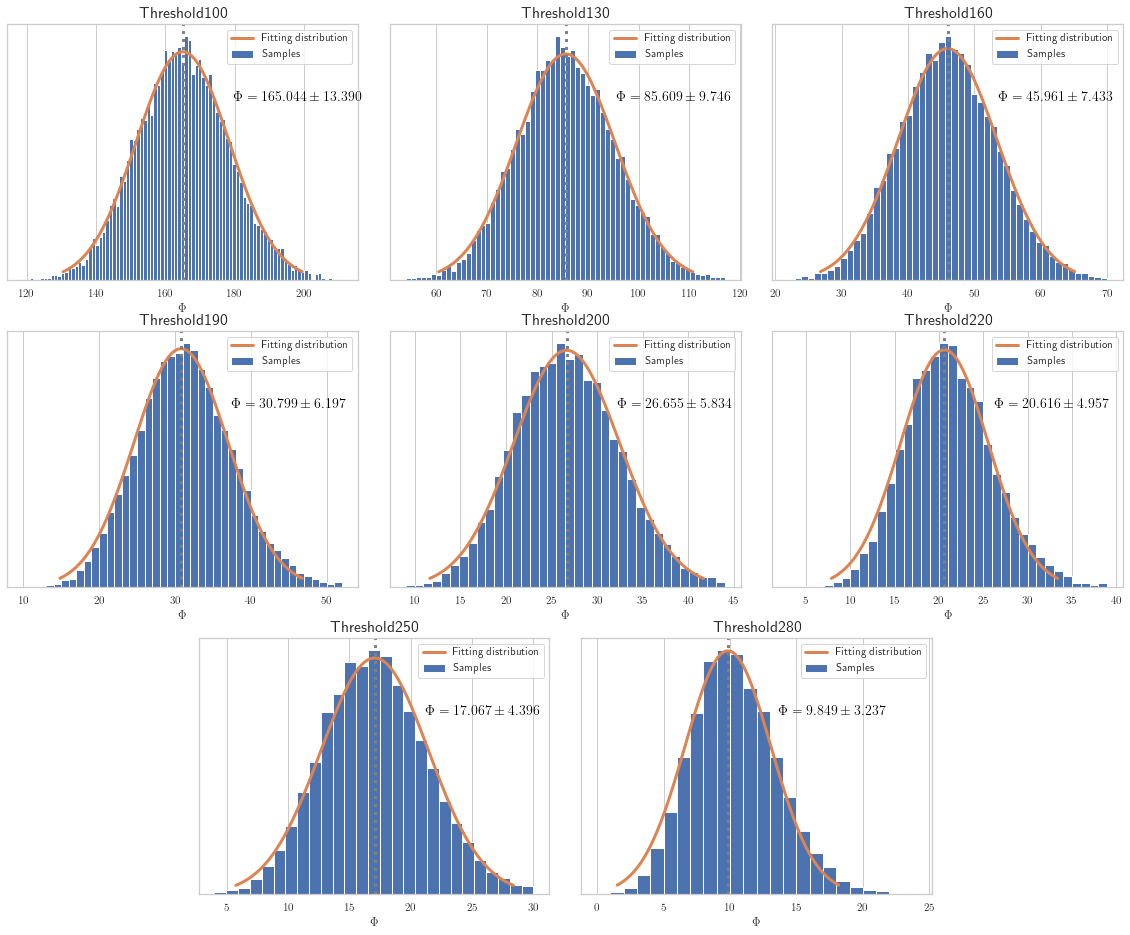

In [31]:
#建立画板，3,2,2共七张图
fig = plt.figure(figsize=(20, 16))
ax0 = plt.subplot2grid((3, 6), (0, 0),colspan=2)
ax1 = plt.subplot2grid((3, 6), (0, 2),colspan=2)
ax2 = plt.subplot2grid((3, 6), (0, 4),colspan=2)
ax3 = plt.subplot2grid((3, 6), (1, 0),colspan=2)
ax4 = plt.subplot2grid((3, 6), (1, 2),colspan=2)
ax5 = plt.subplot2grid((3, 6), (1, 4),colspan=2)
ax6 = plt.subplot2grid((3, 6), (2, 1),colspan=2)
ax7 = plt.subplot2grid((3, 6), (2, 3),colspan=2)
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]

TS_mu = np.zeros(8)
TS_sigma = np.zeros(8)
TS = [100,130,160,190,200,220,250,280]
bins = [93,64,49,42,36,36,27,24]
i = 0
while i<8:
    TS_mu[i], TS_sigma[i] = fitting_histogram(alldata[i],"Threshold{}".format(TS[i]),axes[i],bins[i])
    i+=1
# loc,scale = fitting_histogram(a1,"HV1000",axes,18)
# print(loc,scale)
fig.savefig("TS.eps")
fig.savefig("TS.png")
print(TS_mu,TS_sigma)

In [11]:
# TS_flux = np.asarray([TS,TS_mu,TS_sigma])
# np.savetxt("TS_flux.csv",TS_flux.T,delimiter=",", header="Threshould,$\\bar\Phi$,$\Delta\Phi$")

### 角度（西方）

In [33]:
alldata_West = []
West = ["Vertical","West15","West30"]
# data = read_flux("D:\muon\muondata_G3\\fluxdata\Vertical\muonflux_9.txt")
for we in West:
    data = read_flux("D:\muon\muondata_G3\\fluxdata\{}\muonflux_9.txt".format(we))
    alldata_West.append(data)

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[10.53851995 10.71842089 13.34917307] [3.50933777 3.78688463 4.597802  ]


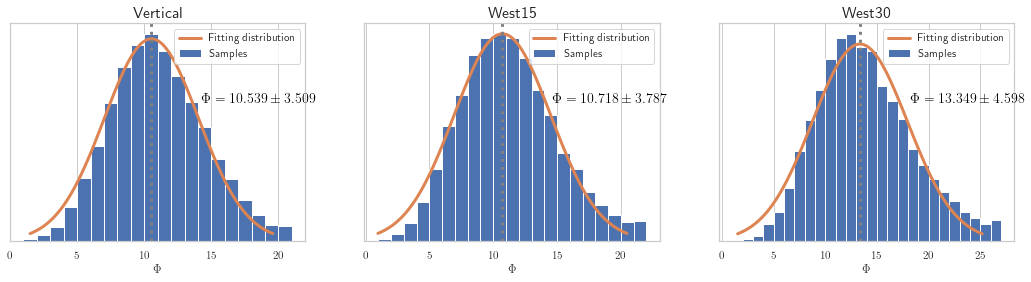

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

West_mu = np.zeros(3)
West_sigma = np.zeros(3)
West = ["Vertical","West15","West30"]
bins = [20,21,26]
i = 0
while i<3:
    alldata_West[i]=correction(alldata_West[i],3)
    West_mu[i], West_sigma[i] = fitting_histogram(alldata_West[i],"{}".format(West[i]),axes[i],bins[i])
    i+=1
# loc,scale = fitting_histogram(a1,"HV1000",axes,18)
# print(loc,scale)
fig.savefig("West.eps")
fig.savefig("West.png")
print(West_mu,West_sigma)

In [56]:
# West_flux = np.asarray([West_mu,West_sigma])
# np.savetxt("West_flux.csv",West_flux.T,delimiter=",", header="$\\bar\Phi$,$\Delta\Phi$")

### 角度（北方）

In [60]:
alldata_North = []#用于存放八个一维数组
North = ["Vertical","North15","North30"]
# data = read_flux("D:\muon\muondata_G3\\fluxdata\Vertical\muonflux_9.txt")
for no in North:
    data = read_flux("D:\muon\muondata_G3\\fluxdata\{}\muonflux_9.txt".format(no))
    alldata_North.append(data)

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[10.53851995  9.39198847 10.38076786] [3.50933777 3.30400234 3.59157762]


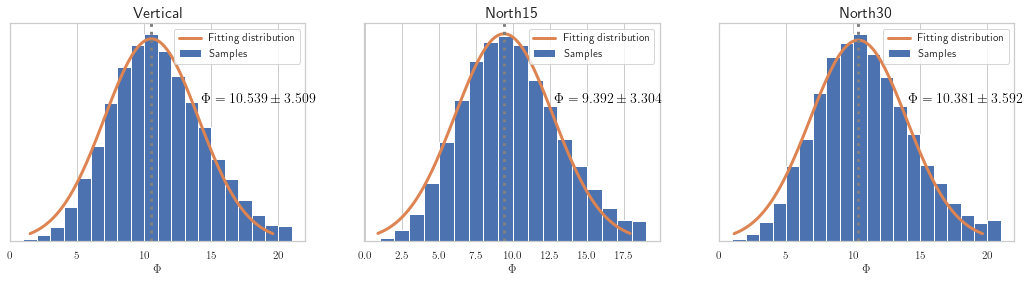

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

North_mu = np.zeros(3)
North_sigma = np.zeros(3)
North = ["Vertical","North15","North30"]
bins = [20,18,20]
i = 0
while i<3:
    alldata_North[i]=correction(alldata_North[i],3)
    North_mu[i], North_sigma[i] = fitting_histogram(alldata_North[i],"{}".format(North[i]),axes[i],bins[i])
    i+=1
# loc,scale = fitting_histogram(a1,"HV1000",axes,18)
# print(loc,scale)
fig.savefig("North.eps")
fig.savefig("North.png")
print(North_mu,North_sigma)

In [17]:
# North_flux = np.asarray([North_mu,North_sigma])
# np.savetxt("North_flux.csv",North_flux.T,delimiter=",", header="$\\bar\Phi$,$\Delta\Phi$")

### Errorbar的绘制

上面完成了缪子通量随HV，Threshold，南北朝向，东西朝向的变化，将自变量、通量均值和方差都分别存起来了，利用这三个数组就可以绘制Errorbar。

In [73]:
def errorbar(x,y,yerr,title):
    fig, ax = plt.subplots(figsize=(4,3))
    ax.errorbar(x=x,y=y,yerr=yerr) 
    ax.set_ylim(0,y.max()+2*yerr.max())
    ax.set_title("Flux at different {}".format(title),fontsize=16)
    fig.savefig("err_{}.eps".format(title), transparent=True)
    fig.savefig("err_{}.png".format(title), doi=300,transparent=True)

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "doi" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


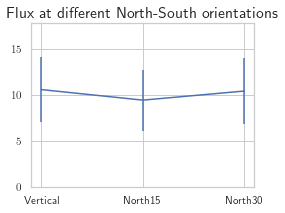

In [74]:
errorbar(North,North_mu,North_sigma,"North-South orientations")

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "doi" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


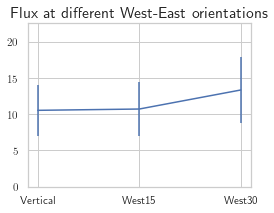

In [75]:
errorbar(West,West_mu,West_sigma,"West-East orientations")

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "doi" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


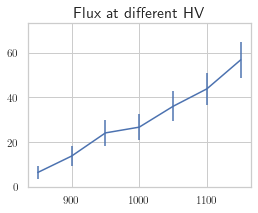

In [40]:
errorbar(HV,HV_mu,HV_sigma,"HV")

C:\Users\wangf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "doi" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


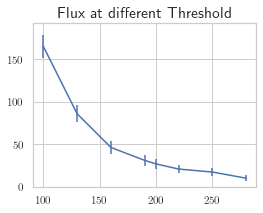

In [41]:
errorbar(TS,TS_mu,TS_sigma,"Threshold")